<a href="https://colab.research.google.com/github/slapazromero/EjercicioKNN_Heart/blob/main/Ejercicios_KNN_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Preproceso.

## Importacion de los datos del dataset.

In [2]:
heart = pd.read_csv('heart.csv')

## Mostrar las primeras y ultimas filas del dataframe importado.

In [3]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


## Modificaciones de los datos.

In [5]:
le = preprocessing.LabelEncoder()
heart['Sex'] = le.fit_transform(heart.Sex.values)
heart['ChestPainType'] = le.fit_transform(heart.ChestPainType.values)
heart['RestingECG'] = le.fit_transform(heart.RestingECG.values)
heart['ExerciseAngina'] = le.fit_transform(heart.ExerciseAngina.values)
heart['ST_Slope'] = le.fit_transform(heart.ST_Slope.values)

In [6]:
copy = heart['Oldpeak'].copy()
for i in range(len(copy)):
  if copy[i] < 0:
    copy[i] *= -1
heart['Oldpeak'] = copy

In [7]:
copy = heart['Oldpeak'].copy()
for i in range(len(copy)):
  if copy[i] < 0:
    copy[i] = copy.mean()
heart['Oldpeak'] = copy

## Mostrar las primeras y ultimas filas del dataframe modificado.

In [8]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [9]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


## Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [10]:
heart.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.915251,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.042712,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


## Mostrar un mapa de calor que indique la correlación entre variables.

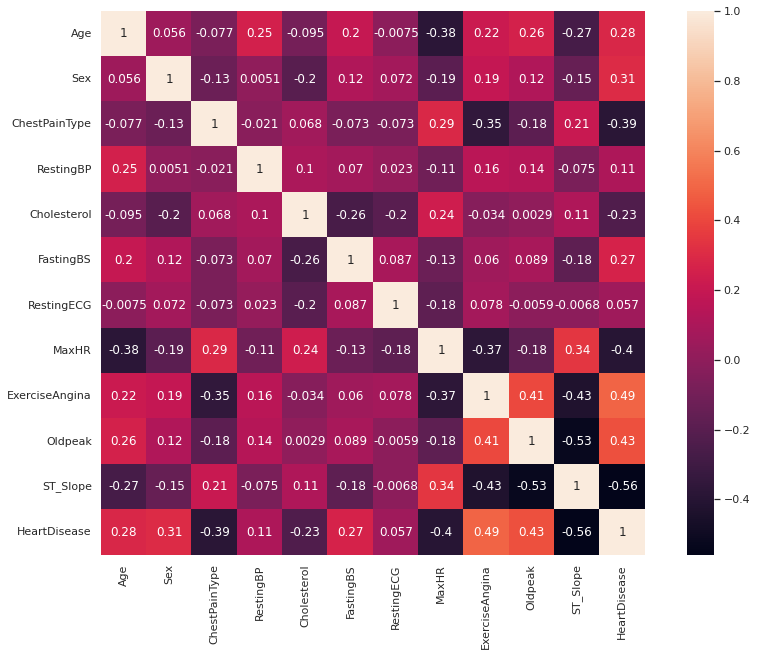

In [11]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(heart.corr(), square=True, annot=True)

## Seleccionar las características a tener en cuenta en el estudio.

In [12]:
caracteristicas = ['ST_Slope', 'Sex', 'ChestPainType']
resultado = ['HeartDisease']

## Separar datos entre datos de entrada y etiquetas (resultados).

In [13]:
x_heart = heart[caracteristicas]
y_heart = heart[resultado]

## Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_heart, y_heart, test_size=0.25)

# Modelo de KNeighborsClassifier

## Optimización de hiperparámetros.

### Validación cruzada.

In [15]:
def validacion_cruzada(index, x_train, y_train, weights):
  kf = KFold(n_splits=5)

  model = KNeighborsClassifier(index, weights=weights)
  scores = []

  for train_fold, test_fold in kf.split(x_train):
    model.fit(x_train.values[train_fold], y_train.values[train_fold].ravel())
    y_predict = model.predict(x_train.values[test_fold])
    scores.append(accuracy_score(y_train.values[test_fold], y_predict))
  return np.mean(scores)


In [16]:
resultados = []
for i in range(2):
  for j in range(1, 31):
    if i == 0:
      resultados.append((validacion_cruzada(j, x_train, y_train, 'uniform'), j, 'uniform'))
    elif i == 1:
      resultados.append((validacion_cruzada(j, x_train, y_train, 'distance'), j, 'distance'))

mejor_resultado = max(resultados)
print(mejor_resultado)

(0.8328361366761875, 19, 'uniform')


## Entrenamiento y predicción.

### Elegir, instanciar y entrenar el modelo.

In [17]:
model = KNeighborsClassifier(mejor_resultado[1], weights=mejor_resultado[2])

### Realizar una predicción con los datos de prueba.

In [18]:
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=19)

In [19]:
y_predict = model.predict(x_test)

## Evaluación.

###  Mostrar el porcentaje de elementos correctamente clasificados.

In [20]:
accuracy_score(y_test, y_predict)

0.8391304347826087

### Mostrar la predicción realizada (imprimir la variable con la predicción).

In [21]:
y_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

### Representar gráficamente la clasificación obtenida (matriz de confusión).

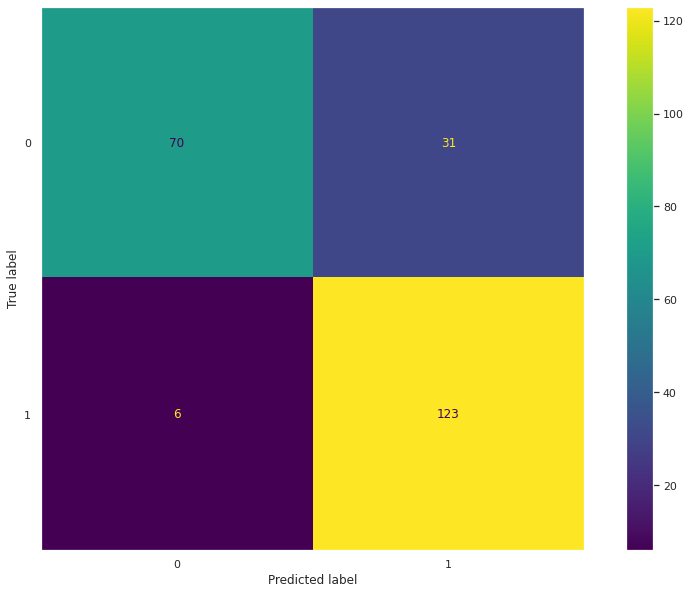

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# Modelo de RadiusNeighborsClassifier

## Optimización de hiperparámetros.

### Validación cruzada.

In [23]:
def validacion_cruzada_radius(index, x_train, y_train, weights):
  kf = KFold(n_splits=5)

  model = RadiusNeighborsClassifier(index, weights=weights)
  scores = []

  for train_fold, test_fold in kf.split(x_train):
    model.fit(x_train.values[train_fold], y_train.values[train_fold].ravel())
    y_predict = model.predict(x_train.values[test_fold])
    scores.append(accuracy_score(y_train.values[test_fold], y_predict))
  return np.mean(scores)


In [24]:
resultados = []
for i in range(2):
  for j in range(2):
    for k in range(1, 31):
      if i == 0:
        resultados.append((validacion_cruzada_radius(k, x_train, y_train, 'uniform'), k, 'uniform'))
      elif i == 1:
        resultados.append((validacion_cruzada_radius(k, x_train, y_train, 'distance'), k, 'distance'))

mejor_resultado_radius = max(resultados)
print(mejor_resultado_radius)

(0.8139320850523644, 1, 'distance')


## Entrenamiento y predicción.

### Elegir, instanciar y entrenar el modelo.

In [25]:
model_radius = RadiusNeighborsClassifier(mejor_resultado_radius[1], weights=mejor_resultado_radius[2])

### Realizar una predicción con los datos de prueba.

In [26]:
model_radius.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:501: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._fit(X, y)


RadiusNeighborsClassifier(radius=1, weights='distance')

In [27]:
y_predict_radius = model_radius.predict(x_test)

## Evaluación.

###  Mostrar el porcentaje de elementos correctamente clasificados.

In [28]:
accuracy_score(y_test, y_predict_radius)

0.8304347826086956

### Mostrar la predicción realizada (imprimir la variable con la predicción).

In [29]:
y_predict_radius

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1])

### Representar gráficamente la clasificación obtenida (matriz de confusión).

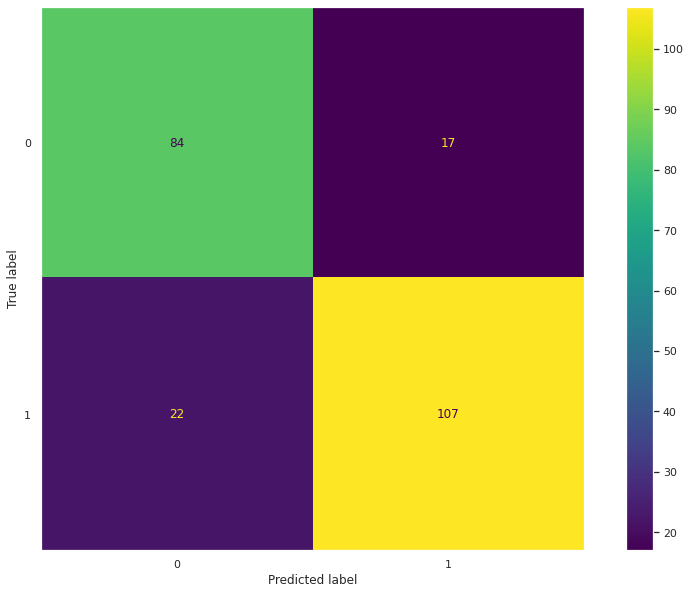

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_radius)
plt.grid(b=None)

# Metric Manhattan

In [31]:
model_manhattan = KNeighborsClassifier(mejor_resultado[1], weights=mejor_resultado[2], metric='manhattan')

In [ ]:
model_manhattan.fit(x_train, y_train)

In [33]:
y_predict = model_manhattan.predict(x_test)

In [34]:
accuracy_score(y_test, y_predict)

0.8391304347826087